In [ ]:
import tunetrees.app.database
from tunetrees.app.database import SessionLocal, sqlalchemy_database_engine
from sqlalchemy.sql import text
from typing import Any, Dict, List
from sqlalchemy import Row, Table, func, select
from sqlalchemy.orm import Query, Session
from datetime import datetime, timedelta
from tabulate import tabulate
from sqlalchemy import Column, Float, ForeignKey, Index, Integer, Table, Text, text


: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib

matplotlib.rcParams['font.size'] = 8.0

In [2]:
db = SessionLocal()

In [3]:
from typing import Optional
from sqlalchemy import Result
from tunetrees.models.tunetrees import User
from sqlalchemy.inspection import inspect

id = 2
stmt = select(User).where(User.ID == id)

db = SessionLocal()
result: Result = db.execute(stmt)
which_row: Optional[Row[User]] = result.fetchone()
if which_row and len(which_row) > 0:
    user: User = which_row[0]
    table = inspect(User)
    for column in table.c:
        print(f"{column.name}: {getattr(user, column.name)}")

ID: 2
hash: 87997944
first_name: Jeffrey
middle_name: None
last_name: Myers
email: jeffrey.myers@example.com
user_name: greenswan192


In [5]:
query: Query[Any] = db.query(t_practice_list_joined)
print(query)

SELECT practice_list_joined."ID" AS "practice_list_joined_ID", practice_list_joined."Title" AS "practice_list_joined_Title", practice_list_joined."Type" AS "practice_list_joined_Type", practice_list_joined."Structure" AS "practice_list_joined_Structure", practice_list_joined."Mode" AS "practice_list_joined_Mode", practice_list_joined."Incipit" AS "practice_list_joined_Incipit", practice_list_joined."Learned" AS "practice_list_joined_Learned", practice_list_joined."Practiced" AS "practice_list_joined_Practiced", practice_list_joined."Quality" AS "practice_list_joined_Quality", practice_list_joined."Easiness" AS "practice_list_joined_Easiness", practice_list_joined."Interval" AS "practice_list_joined_Interval", practice_list_joined."Repetitions" AS "practice_list_joined_Repetitions", practice_list_joined."ReviewDate" AS "practice_list_joined_ReviewDate", practice_list_joined."BackupPracticed" AS "practice_list_joined_BackupPracticed", practice_list_joined."NotePrivate" AS "practice_list_

In [6]:
order_by_query = query.order_by(
            func.DATE(t_practice_list_joined.columns.get("Practiced")).desc()
        )

In [7]:
def get_most_recent_review_date()->datetime:
    most_recent_schedualed  = query.order_by(
                func.DATE(t_practice_list_joined.columns.get("Practiced")).desc()
            ).limit(1)

    review_date_column_name = "ReviewDate"
    review_date = t_practice_list_joined.columns.get(review_date_column_name)
    assert review_date is not None
    review_date_column_index = list(t_practice_list_joined.columns.keys()).index(review_date_column_name)
    most_recent_review_date_str = most_recent_schedualed[0][review_date_column_index]
    most_recent_review_date = datetime.fromisoformat(most_recent_review_date_str)
    return most_recent_review_date
most_recent_review_date = get_most_recent_review_date()
print(most_recent_review_date)

2025-01-27 12:27:08


In [13]:
def get_most_recent_practice_date()->datetime:
    most_recent_schedualed  = query.order_by(
                func.DATE(t_practice_list_joined.columns.get("Practiced")).desc()
            ).limit(1)

    practice_date_column_name = "Practiced"
    practice_date = t_practice_list_joined.columns.get(practice_date_column_name)
    assert practice_date is not None
    practice_date_column_index = list(t_practice_list_joined.columns.keys()).index(practice_date_column_name)
    most_recent_practice_date_str = most_recent_schedualed[0][practice_date_column_index]
    most_recent_practice_date = datetime.fromisoformat(most_recent_practice_date_str)
    return most_recent_practice_date
most_recent_practice_date = get_most_recent_practice_date()
print(most_recent_practice_date)

SELECT practice_list_joined."ID" AS "practice_list_joined_ID", practice_list_joined."Title" AS "practice_list_joined_Title", practice_list_joined."Type" AS "practice_list_joined_Type", practice_list_joined."Structure" AS "practice_list_joined_Structure", practice_list_joined."Mode" AS "practice_list_joined_Mode", practice_list_joined."Incipit" AS "practice_list_joined_Incipit", practice_list_joined."Learned" AS "practice_list_joined_Learned", practice_list_joined."Practiced" AS "practice_list_joined_Practiced", practice_list_joined."Quality" AS "practice_list_joined_Quality", practice_list_joined."Easiness" AS "practice_list_joined_Easiness", practice_list_joined."Interval" AS "practice_list_joined_Interval", practice_list_joined."Repetitions" AS "practice_list_joined_Repetitions", practice_list_joined."ReviewDate" AS "practice_list_joined_ReviewDate", practice_list_joined."BackupPracticed" AS "practice_list_joined_BackupPracticed", practice_list_joined."NotePrivate" AS "practice_list_

In [18]:
# most_recent_practice_date = get_most_recent_practice_date()
skip: int = 0

review_sitdown_date = datetime.fromisoformat("2024-07-08 12:27:08") # or datetime.today()

acceptable_delinquency_window = 7

scheduled_rows = (
        query.filter(
            func.DATE(t_practice_list_joined.columns.get("ReviewDate"))
            > review_sitdown_date - timedelta(acceptable_delinquency_window)
        )
        .filter(
            func.DATE(t_practice_list_joined.columns.get("ReviewDate"))
            <= review_sitdown_date
        )
        .order_by(func.DATE(t_practice_list_joined.columns.get("ReviewDate")).desc())
        .offset(skip)
        .limit(100)
        .all()
)

print(tabulate(scheduled_rows, headers=t_practice_list_joined.columns.keys()))

  ID  Title                  Type    Structure    Mode          Incipit                           Learned     Practiced              Quality    Easiness    Interval    Repetitions  ReviewDate           BackupPracticed      NotePrivate                                                                                                          NotePublic                        Tags
----  ---------------------  ------  -----------  ------------  --------------------------------  ----------  -------------------  ---------  ----------  ----------  -------------  -------------------  -------------------  -------------------------------------------------------------------------------------------------------------------  --------------------------------  -------------------
2794  Back of the Haggard    Hpipe   AABB         D Major       |dcdf ecA2|dBGB AFD2|             2020-09-24  2024-06-26 20:52:45          3        1.3           12              4  2024-07-08 20:52:45  2022-07-06 10:56:02  Foll

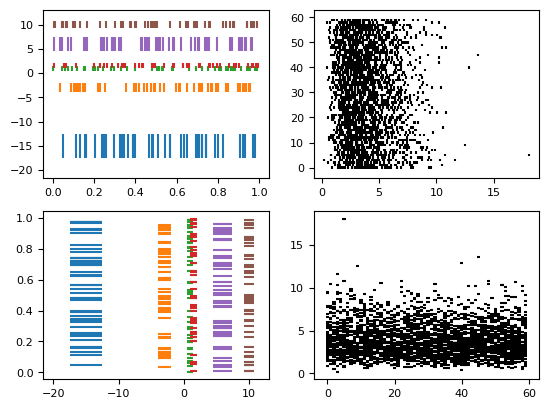

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = [f'C{i}' for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)
assert isinstance(axs, np.ndarray)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()